In [2]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data = load_breast_cancer()

In [5]:
X, y = data['data'], data['target'] # Acessamos os dados e os rótulos

In [6]:
data['target_names'] # Nomes dos rótulos (0 e 1)

array(['malignant', 'benign'], dtype='<U9')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Dividimos em treino e teste, com 20% dos dados para teste

In [8]:
clf = LinearSVC() # Criamos o classificador
clf.fit(X_train, y_train) # Treinamos o classificador

LinearSVC()

In [9]:
clf.score(X_test, y_test) # Analisando a acurácia do classificador nos dados de teste

0.9473684210526315

In [10]:
clf.predict([X_test[0]]) # Fazendo uma predição em um exemplo de teste

array([0])

In [11]:
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_train, 10)) # Utilizamos o KMeans que utiliza 10 centróides como base de referência para as explicações.

In [12]:
shap_values = explainer.shap_values(X_test) # O explainer calcula os valores SHAP para todos os exemplos de teste

100%|██████████| 114/114 [00:05<00:00, 21.34it/s]


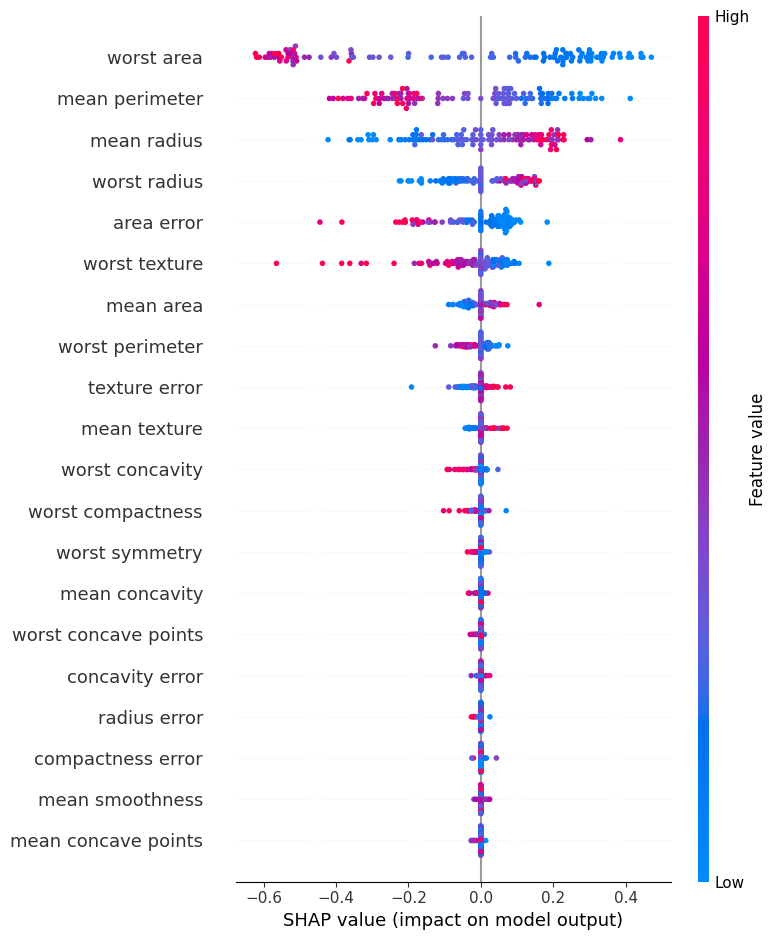

In [13]:
shap.summary_plot(shap_values, X_test, feature_names=data['feature_names'])
# Aqui temos um gráfico de resumo que mostra a importância das características em todo o conjunto de teste.
# Quanto mais para cima a característica estiver, mais decisiva ela é para o modelo.

In [14]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0], feature_names=data['feature_names']) # Aqui temos a explicação para a primeira amostra do conjunto de teste.
# Conseguimos ver como cada característica contribui para a decisão do modelo.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], X_test[1], feature_names=data['feature_names']) # Explicação para a segunda amostra do conjunto de teste.

In [ ]:
mean_abs_shap_values = np.abs(shap_values).mean(axis=0) # Calculamos a média dos valores absolutos dos valores SHAP para cada característica

In [ ]:
feature_names = data['feature_names'] # Nomes das características
feature_importance = sorted(zip(feature_names, mean_abs_shap_values), key=lambda x: x[1], reverse=True) # Ordenamos as características pela importância média

In [18]:
feature_importance

[(np.str_('worst area'), np.float64(0.3271372852956056)),
 (np.str_('mean perimeter'), np.float64(0.1859503881164039)),
 (np.str_('mean radius'), np.float64(0.14377286068843934)),
 (np.str_('worst radius'), np.float64(0.08930021699910703)),
 (np.str_('area error'), np.float64(0.08269752672431997)),
 (np.str_('worst texture'), np.float64(0.07249365046720568)),
 (np.str_('mean area'), np.float64(0.03053091275858315)),
 (np.str_('worst perimeter'), np.float64(0.0240775251483559)),
 (np.str_('texture error'), np.float64(0.019383027927320044)),
 (np.str_('mean texture'), np.float64(0.013817187592823991)),
 (np.str_('worst concavity'), np.float64(0.00922580155382248)),
 (np.str_('worst compactness'), np.float64(0.007638122613328323)),
 (np.str_('worst symmetry'), np.float64(0.0024528373306827943)),
 (np.str_('mean concavity'), np.float64(0.0018511875529338446)),
 (np.str_('worst concave points'), np.float64(0.0013788268870516716)),
 (np.str_('concavity error'), np.float64(0.00116185449104947

In [19]:
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

worst area: 0.3271
mean perimeter: 0.1860
mean radius: 0.1438
worst radius: 0.0893
area error: 0.0827
worst texture: 0.0725
mean area: 0.0305
worst perimeter: 0.0241
texture error: 0.0194
mean texture: 0.0138
worst concavity: 0.0092
worst compactness: 0.0076
worst symmetry: 0.0025
mean concavity: 0.0019
worst concave points: 0.0014
concavity error: 0.0012
radius error: 0.0011
compactness error: 0.0011
mean smoothness: 0.0011
mean concave points: 0.0010
symmetry error: 0.0008
perimeter error: 0.0008
fractal dimension error: 0.0008
mean fractal dimension: 0.0007
mean symmetry: 0.0007
mean compactness: 0.0006
worst smoothness: 0.0006
worst fractal dimension: 0.0006
concave points error: 0.0005
smoothness error: 0.0003
